   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

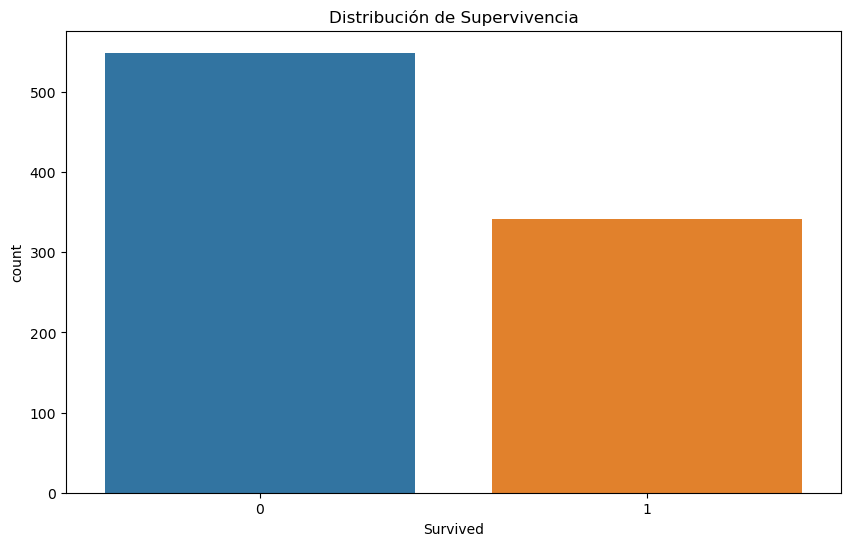

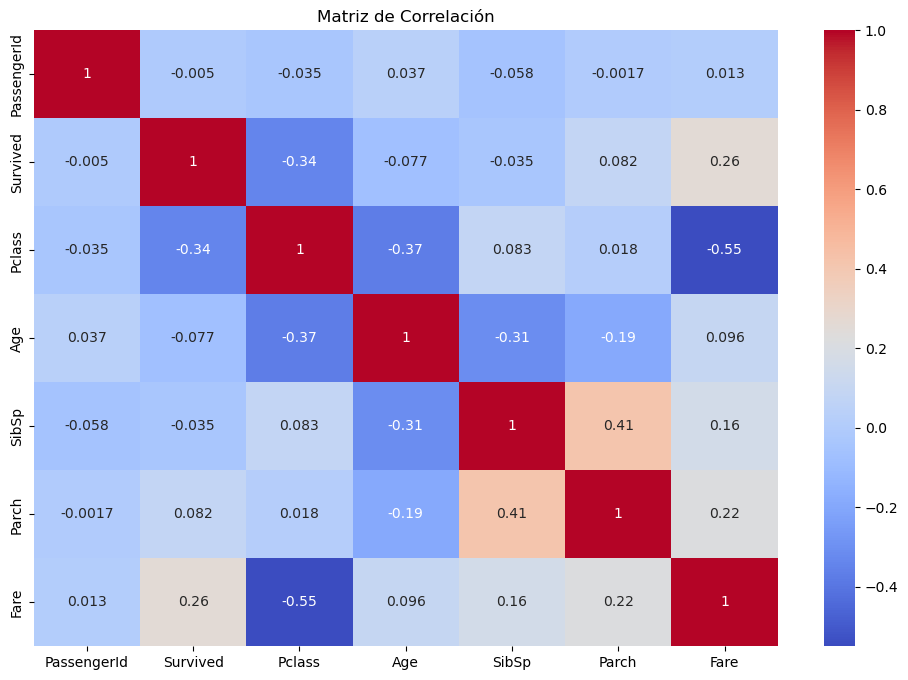

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64
Características seleccionadas: Index(['Pclass', 'Parch', 'Fare', 'Sex_male', 'Embarked_S'], dtype='object')
Accuracy: 0.7821229050279329
Precision: 0.7536231884057971
Recall: 0.7027027027027027
F1 Score: 0.7272727272727273
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Confusion Matrix:
 [[88 17]
 [22 52]]


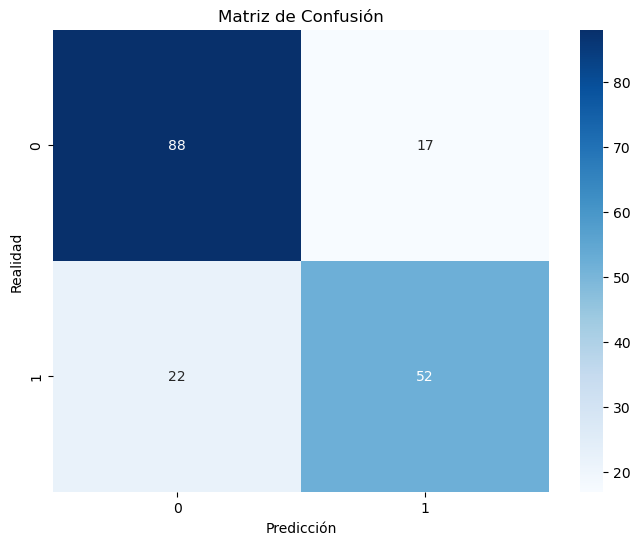

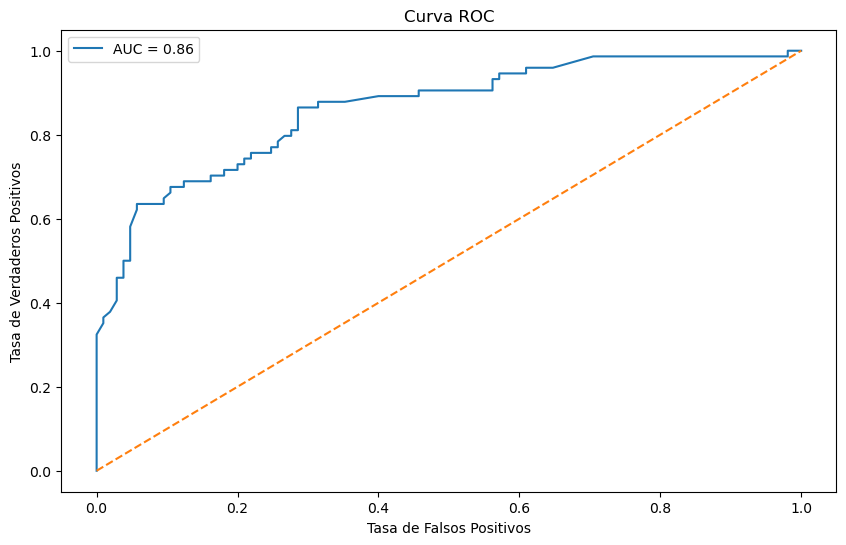

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Paso 1: Cargar el dataset y mostrar las primeras filas
file_path = 'C:\\python\\Titanic-Dataset.csv'
data = pd.read_csv(file_path)
print(data.head())

# Paso 1: Análisis exploratorio de los datos
print(data.describe())
print(data.info())

# Distribución de la variable objetivo 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=data)
plt.title('Distribución de Supervivencia')
plt.show()

# Matriz de correlación
# Seleccionar solo columnas numéricas para la matriz de correlación
numerical_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Paso 2: Preprocesamiento de los datos
# Eliminación de columnas irrelevantes
data = data.drop(columns=['Name', 'Ticket', 'Cabin'])

# Imputación de valores faltantes
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Codificación de variables categóricas
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Confirmar la ausencia de valores faltantes
print(data.isnull().sum())

# Paso 3: Selección de características
# Separar las características y la variable objetivo
X = data.drop(columns='Survived')
y = data['Survived']

# Selección de características
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)
X_selected = selector.transform(X)

# Mostrar las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

# Paso 4: División del dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Paso 5: Entrenamiento del modelo
# Crear el modelo de Regresión Logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Paso 6: Evaluación del desempeño del modelo
# Predicciones
y_pred = model.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Reporte de clasificación
report = classification_report(y_test, y_pred)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

# Paso 7: Visualización de los resultados
# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Curva ROC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Paso 8: Interpretación y documentación de los resultados
# Los resultados del modelo se interpretan basándose en las métricas de evaluación y visualizaciones.
# La precisión, precisión, recall y F1-score indican el rendimiento del modelo.
# La matriz de confusión y la curva ROC proporcionan una visualización de la capacidad del modelo para distinguir entre las clases.
# La selección de características ha identificado las variables más influyentes en la predicción.
